# GHCN data
## Averages
### by month and by season
Plotting averages

In [17]:
import pandas as pd

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
%load_ext autoreload
%autoreload 2
import src.ghcn as ghcn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from dfply import *

In [20]:
%%time
avg_temp_df = pd.read_csv("./../data/avg_ghcn_temps.csv")

CPU times: user 74.5 ms, sys: 19.7 ms, total: 94.2 ms
Wall time: 93.7 ms


In [21]:
len(avg_temp_df)

136618

In [22]:
avg_temp_df.head()

,date_dt,day,month,year,ELEMENT,temp_f
0,1833-01-02,2,1,1833,TMAX,29.48
1,1833-01-02,2,1,1833,TMIN,23.36
2,1833-01-03,3,1,1833,TMAX,26.42
3,1833-01-03,3,1,1833,TMIN,19.76
4,1833-01-04,4,1,1833,TMAX,24.98


In [23]:
%%time
avg_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136618 entries, 0 to 136617
Data columns (total 6 columns):
date_dt    136618 non-null object
day        136618 non-null int64
month      136618 non-null int64
year       136618 non-null int64
ELEMENT    136618 non-null object
temp_f     136618 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 20.8 MB
CPU times: user 241 ms, sys: 0 ns, total: 241 ms
Wall time: 240 ms


In [39]:
month_avg_temps_df = avg_temp_df.groupby(
    ["year", "month", "ELEMENT"],
    as_index = False).agg(
    {"temp_f": "mean"})

In [40]:
month_avg_temps_df.head()

,year,month,ELEMENT,temp_f
0,1833,1,TMAX,33.554000
1,1833,1,TMIN,22.892000
2,1833,2,TMAX,48.155000
3,1833,2,TMIN,36.911429
4,1833,3,TMAX,43.763871


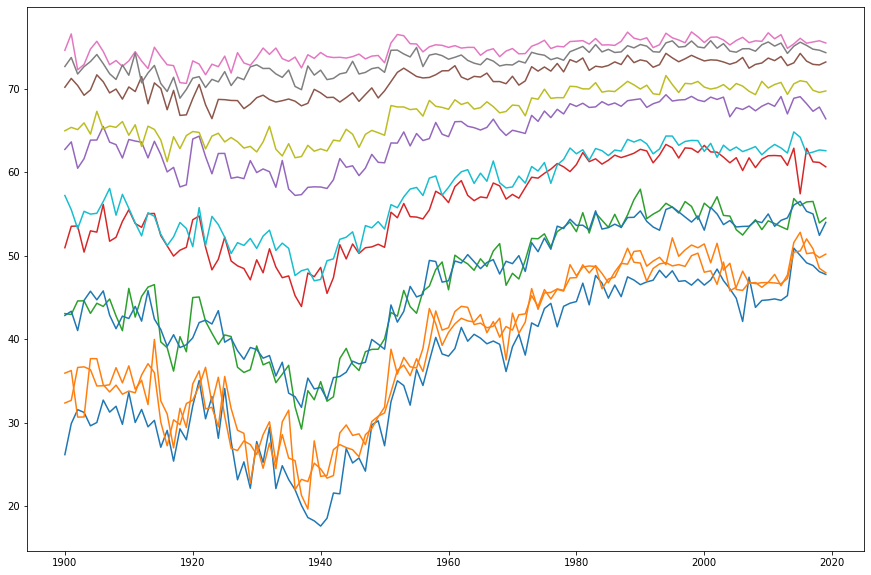

In [43]:
fig, ax = plt.subplots(figsize=(15,10))
element = "TMAX"
min_year = 1900
max_year = 2019
for month in range(1, 13):
    month_temps = month_avg_temps_df[
        (month_avg_temps_df.month == month) &\
        (month_avg_temps_df.year >= min_year) &\
        (month_avg_temps_df.year <= max_year) &\
        (month_avg_temps_df.ELEMENT == element)
    ]
    ax.plot(month_temps.year, month_temps.temp_f)

### By season
Seasons are:
- Winter = Dec, Jan, Feb
- Spring = Mar, Apr, May
- Summer = June, July, Aug
- Fall = Sept, Oct, Nov

In [44]:
seasons = ["win", "spr", "sum", "aut"]

In [73]:
avg_temp_df["season_num"] = avg_temp_df.month.map(lambda x: int(np.floor((x % 12) / 3)))
avg_temp_df["season"] = avg_temp_df.season_num.map(lambda x: seasons[x])
avg_temp_df["season_yr"] = np.where(avg_temp_df.month == 12, avg_temp_df.year + 1, avg_temp_df.year)

In [74]:
season_avg_temp = avg_temp_df.groupby(
    ["season_num", "season", "season_yr", "ELEMENT"],
    as_index = False).agg({
    "temp_f": "mean"})

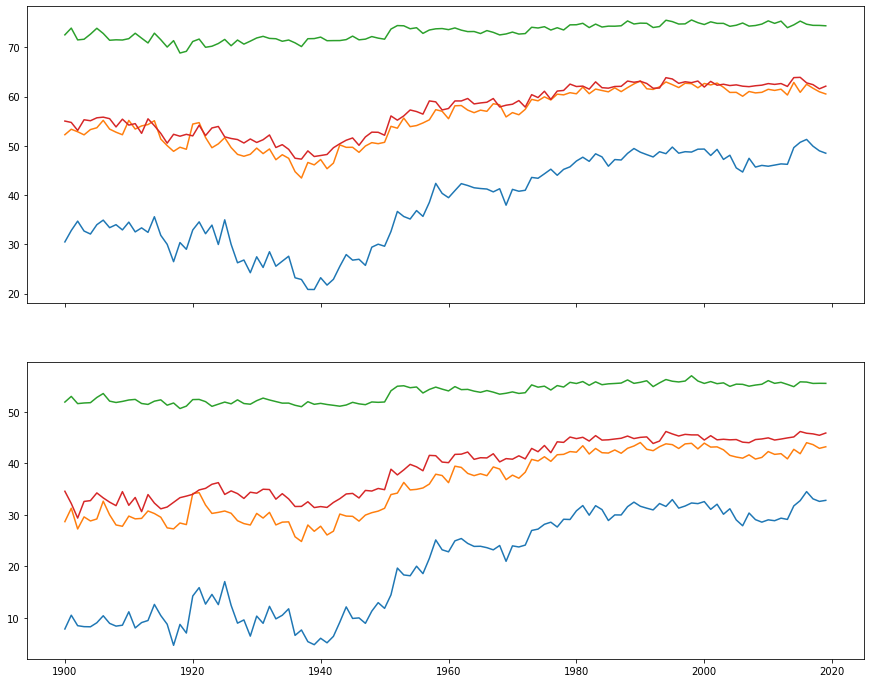

In [75]:
fig, ax = plt.subplots(figsize=(15,12), nrows = 2, sharex = True)
min_year = 1900
max_year = 2019
for i, element in enumerate(["TMAX", "TMIN"]):
    for j, season in enumerate(seasons):
        season_temps = season_avg_temp[
            (season_avg_temp.season == season) &\
            (season_avg_temp.season_yr >= min_year) &\
            (season_avg_temp.season_yr <= max_year) &\
            (season_avg_temp.ELEMENT == element)
        ]
        ax[i].plot(season_temps.season_yr, season_temps.temp_f)

In [77]:
season_avg_temp["season_yr_num"] = season_avg_temp.season_yr + season_avg_temp.season_num / 4

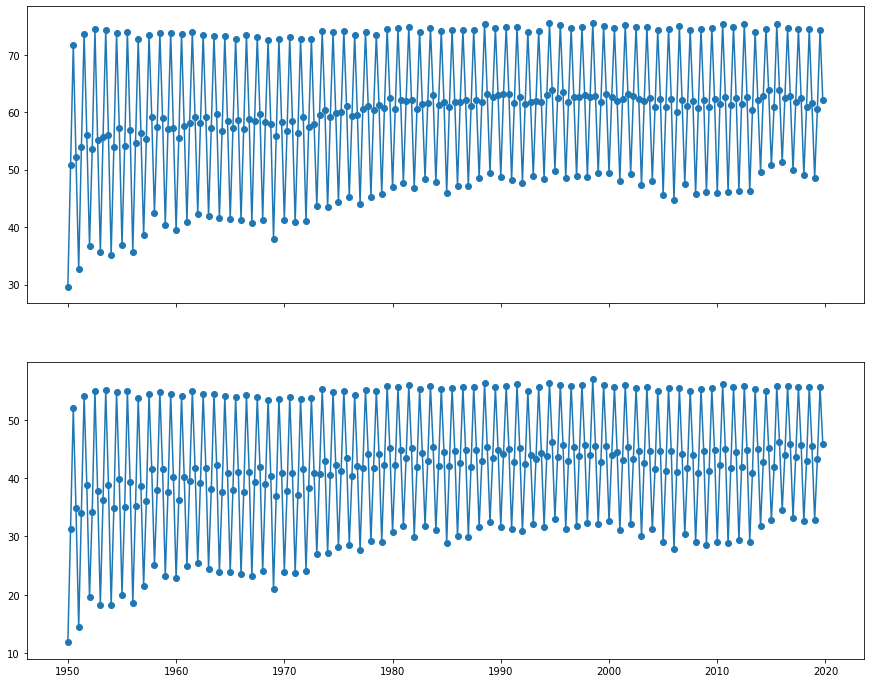

In [86]:
fig, ax = plt.subplots(figsize=(15,12), nrows = 2, sharex = True)
min_year = 1950
max_year = 2019
for i, element in enumerate(["TMAX", "TMIN"]):
    temps = season_avg_temp[
        (season_avg_temp.season_yr >= min_year) &\
        (season_avg_temp.season_yr <= max_year) &\
        (season_avg_temp.ELEMENT == element)
    ].sort_values("season_yr_num")
    ax[i].plot(temps.season_yr_num, temps.temp_f)

    for season in seasons:
        season_temps = temps[temps.season == season]
        ax[i].plot(season_temps.season_yr_num, temps.temp_f)